In [1]:
import pandas as pd
import numpy as np

In [2]:
daily_consumption_data = pd.read_excel('DailyConsumption (4).xlsx')
daily_consumption_data.head()

,CCMS ID,Timestamp,CCMS kWh,Grid kVAh,Meter ON Duration,ON Load Duration,Expected kWh
0,SMR03-0219-0792,2019-04-30 00:00:00,53.07,53.45,23:15:1,10:13:17,52.84
1,SMR03-0219-0792,2019-04-29 00:00:00,54.45,54.86,23:19:30,10:25:20,53.88
2,SMR03-0219-0792,2019-04-28 00:00:00,59.19,55.84,23:58:29,10:48:38,55.89
3,SMR03-0219-0792,2019-04-27 00:00:00,52.49,52.88,23:58:40,11:21:3,58.68
4,SMR03-0219-0792,2019-04-26 00:00:00,45.57,45.92,23:57:51,10:51:38,56.15


In [3]:
daily_consumption_data.shape

(30, 7)

In [4]:
daily_consumption_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 7 columns):
CCMS ID              30 non-null object
Timestamp            30 non-null object
CCMS kWh             30 non-null float64
Grid kVAh            30 non-null float64
Meter ON Duration    30 non-null object
ON Load Duration     30 non-null object
Expected kWh         30 non-null float64
dtypes: float64(3), object(4)
memory usage: 1.7+ KB


In [5]:
daily_consumption_data.columns

Index([u'CCMS ID', u'Timestamp', u'CCMS kWh', u'Grid kVAh',
       u'Meter ON Duration', u'ON Load Duration', u'Expected kWh'],
      dtype='object')

In [6]:
daily_consumption_data.isnull().sum()

CCMS ID              0
Timestamp            0
CCMS kWh             0
Grid kVAh            0
Meter ON Duration    0
ON Load Duration     0
Expected kWh         0
dtype: int64

In [7]:
daily_consumption_data.describe()

,CCMS kWh,Grid kVAh,Expected kWh
count,30.000000,30.000000,30.000000
mean,51.359333,52.563667,55.865667
std,5.768197,8.855620,3.888521
min,35.220000,35.500000,41.730000
25%,48.770000,49.110000,55.777500
50%,51.250000,51.535000,56.680000
75%,55.157500,55.492500,58.172500
max,59.360000,89.540000,59.660000


In [8]:
daily_consumption_data['Timestamp'] = pd.to_datetime(daily_consumption_data['Timestamp'])
daily_consumption_data.set_index('Timestamp', inplace=True)
daily_consumption_data.head()

,CCMS ID,CCMS kWh,Grid kVAh,Meter ON Duration,ON Load Duration,Expected kWh
Timestamp,,,,,,
2019-04-30,SMR03-0219-0792,53.07,53.45,23:15:1,10:13:17,52.84
2019-04-29,SMR03-0219-0792,54.45,54.86,23:19:30,10:25:20,53.88
2019-04-28,SMR03-0219-0792,59.19,55.84,23:58:29,10:48:38,55.89
2019-04-27,SMR03-0219-0792,52.49,52.88,23:58:40,11:21:3,58.68
2019-04-26,SMR03-0219-0792,45.57,45.92,23:57:51,10:51:38,56.15


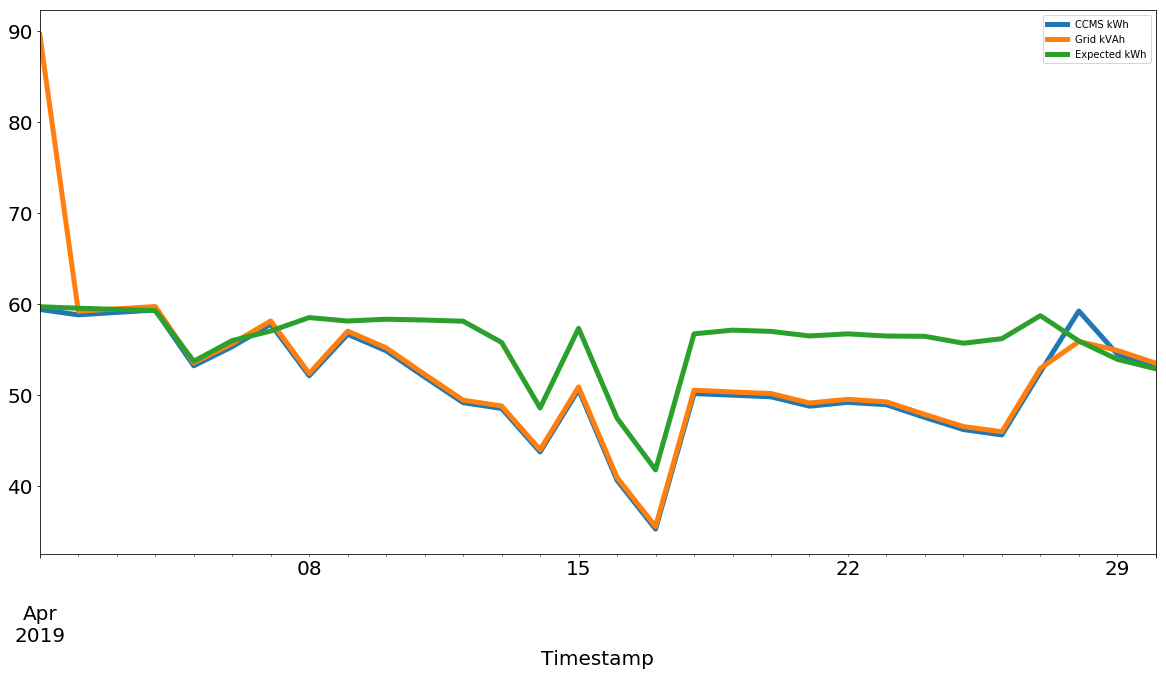

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
daily_consumption_data.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

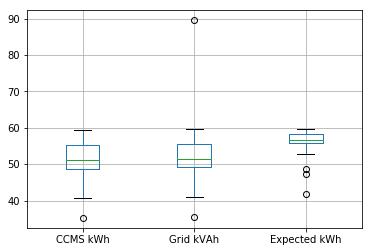

In [10]:
daily_consumption_data.boxplot()

In [11]:
instant_raw_report_data = pd.read_excel('Instant Raw Report (11).xlsx')
instant_raw_report_data.head()

,CCMS ID,Timestamp,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),...,B Phase kW,Active Mode,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh,Power On Time(Hrs),Relay on Time(Hrs),Current Day Meter on Period,Current Day Relay on Period
0,SMR03-0219-0252,2019-05-01 23:44:42,5.11,5.15,10.66,5.47,5.85,233.48,234.57,235.40,...,1.36,AUTO,7329.234,7372.664,49.204,49.591,1615:42:7,791:3:44,22:47:44,9:38:30
1,SMR03-0219-0252,2019-05-01 23:29:04,5.11,5.14,10.65,5.48,5.83,233.56,234.34,235.45,...,1.35,AUTO,7327.901,7371.322,47.871,48.249,1615:26:31,790:48:8,22:32:8,9:22:54
2,SMR03-0219-0252,2019-05-01 23:13:58,5.11,5.14,10.74,5.52,5.89,231.74,232.72,233.72,...,1.35,AUTO,7326.616,7370.028,46.586,46.955,1615:11:25,790:33:2,22:17:2,9:7:48
3,SMR03-0219-0252,2019-05-01 22:57:49,5.12,5.16,10.73,5.53,5.90,232.01,233.22,234.14,...,1.36,AUTO,7325.238,7368.641,45.208,45.568,1614:55:17,790:16:54,22:0:54,8:51:40
4,SMR03-0219-0252,2019-05-01 22:42:12,5.17,5.22,10.79,5.55,5.92,233.17,234.27,235.16,...,1.37,AUTO,7323.899,7367.293,43.869,44.220,1614:39:41,790:1:18,21:45:18,8:36:4


In [12]:
instant_raw_report_data.shape

(2677, 29)

In [13]:
instant_raw_report_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2677 entries, 0 to 2676
Data columns (total 29 columns):
CCMS ID                        2677 non-null object
Timestamp                      2677 non-null object
Active Power kW                2677 non-null float64
Apparent Power kVA             2677 non-null float64
Current R (A)                  2677 non-null float64
Current Y (A)                  2677 non-null float64
Current B (A)                  2677 non-null float64
Voltage R (V)                  2677 non-null float64
Voltage Y (V)                  2677 non-null float64
Voltage B (V)                  2677 non-null float64
Total PF                       2677 non-null object
Frequency (Hz)                 2677 non-null float64
MD kVA                         2677 non-null float64
MD kW                          2677 non-null float64
Load Relay Status R            2677 non-null object
Load Relay Status Y            2677 non-null object
Load Relay Status B            2677 non-null objec

In [14]:
instant_raw_report_data.isnull().sum()

CCMS ID                        0
Timestamp                      0
Active Power kW                0
Apparent Power kVA             0
Current R (A)                  0
Current Y (A)                  0
Current B (A)                  0
Voltage R (V)                  0
Voltage Y (V)                  0
Voltage B (V)                  0
Total PF                       0
Frequency (Hz)                 0
MD kVA                         0
MD kW                          0
Load Relay Status R            0
Load Relay Status Y            0
Load Relay Status B            0
R Phase kW                     0
Y Phase kW                     0
B Phase kW                     0
Active Mode                    0
Total Active Energy            0
Total Apparent Energy          0
Current Day kWh                0
Current Day kVAh               0
Power On Time(Hrs)             0
Relay on Time(Hrs)             0
Current Day Meter on Period    0
Current Day Relay on Period    0
dtype: int64

In [15]:
instant_raw_report_data.describe()

,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Frequency (Hz),MD kVA,MD kW,R Phase kW,Y Phase kW,B Phase kW,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh
count,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000,2677.000000
mean,2.168326,2.182518,4.783605,1.353747,3.043582,239.106235,239.375387,239.260362,50.014967,4.027826,4.005151,1.131102,0.315103,0.717826,6554.472007,6592.560025,26.731829,26.926167
std,2.381102,2.396681,5.228688,1.959552,3.338796,8.257170,8.790644,9.200175,0.066142,1.907022,1.895738,1.235374,0.454676,0.788004,448.534381,451.449749,10.722209,10.792976
min,0.000000,0.000000,0.000000,0.000000,0.000000,220.980000,220.210000,219.570000,49.721000,0.000000,0.000000,0.000000,0.000000,0.000000,5743.752000,5776.698000,0.018000,0.031000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,232.330000,231.990000,231.360000,49.983000,1.290000,1.280000,0.000000,0.000000,0.000000,6174.681000,6210.318000,24.067000,24.283000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,238.750000,239.060000,239.000000,50.022000,5.350000,5.320000,0.000000,0.000000,0.000000,6571.720000,6609.643000,27.296000,27.534000
75%,4.580000,4.610000,10.470000,1.370000,6.720000,246.240000,247.150000,247.110000,50.061000,5.350000,5.320000,2.470000,0.310000,1.580000,6940.359000,6980.919000,31.699000,31.909000
max,5.540000,5.570000,11.520000,5.640000,7.900000,257.190000,258.940000,259.490000,50.327000,5.350000,5.320000,2.690000,1.290000,1.870000,7329.234000,7372.664000,59.054000,59.439000


In [16]:
# instant_raw_report_data['Timestamp'] = pd.to_datetime(instant_raw_report_data['Timestamp'])
# instant_raw_report_data.set_index('Timestamp', inplace=True)
# instant_raw_report_data.head()
instant_raw_report_data['Timestamp'] = pd.to_datetime(instant_raw_report_data['Timestamp'])
instant_raw_report_data.set_index('Timestamp', inplace=True)
instant_raw_report_data.head()

,CCMS ID,Active Power kW,Apparent Power kVA,Current R (A),Current Y (A),Current B (A),Voltage R (V),Voltage Y (V),Voltage B (V),Total PF,...,B Phase kW,Active Mode,Total Active Energy,Total Apparent Energy,Current Day kWh,Current Day kVAh,Power On Time(Hrs),Relay on Time(Hrs),Current Day Meter on Period,Current Day Relay on Period
Timestamp,,,,,,,,,,,,,,,,,,,,,
2019-05-01 23:44:42,SMR03-0219-0252,5.11,5.15,10.66,5.47,5.85,233.48,234.57,235.40,0.992 Ld,...,1.36,AUTO,7329.234,7372.664,49.204,49.591,1615:42:7,791:3:44,22:47:44,9:38:30
2019-05-01 23:29:04,SMR03-0219-0252,5.11,5.14,10.65,5.48,5.83,233.56,234.34,235.45,0.992 Ld,...,1.35,AUTO,7327.901,7371.322,47.871,48.249,1615:26:31,790:48:8,22:32:8,9:22:54
2019-05-01 23:13:58,SMR03-0219-0252,5.11,5.14,10.74,5.52,5.89,231.74,232.72,233.72,0.992 Ld,...,1.35,AUTO,7326.616,7370.028,46.586,46.955,1615:11:25,790:33:2,22:17:2,9:7:48
2019-05-01 22:57:49,SMR03-0219-0252,5.12,5.16,10.73,5.53,5.90,232.01,233.22,234.14,0.992 Ld,...,1.36,AUTO,7325.238,7368.641,45.208,45.568,1614:55:17,790:16:54,22:0:54,8:51:40
2019-05-01 22:42:12,SMR03-0219-0252,5.17,5.22,10.79,5.55,5.92,233.17,234.27,235.16,0.989 Ld,...,1.37,AUTO,7323.899,7367.293,43.869,44.220,1614:39:41,790:1:18,21:45:18,8:36:4


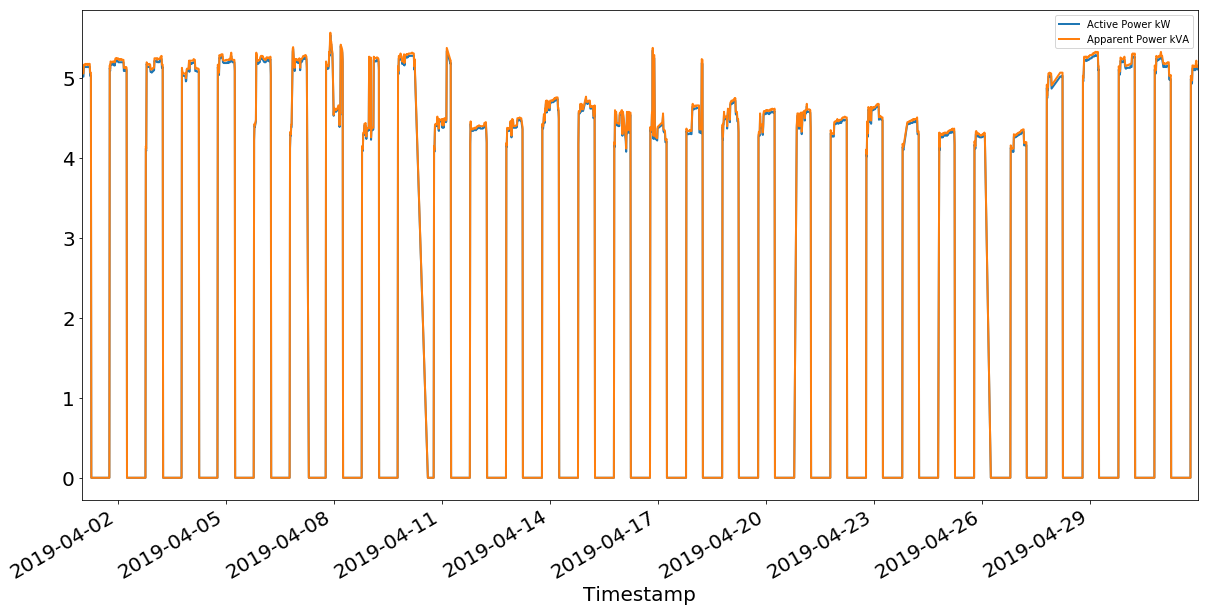

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
instant_raw_report_data[['Active Power kW', 'Apparent Power kVA']].plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

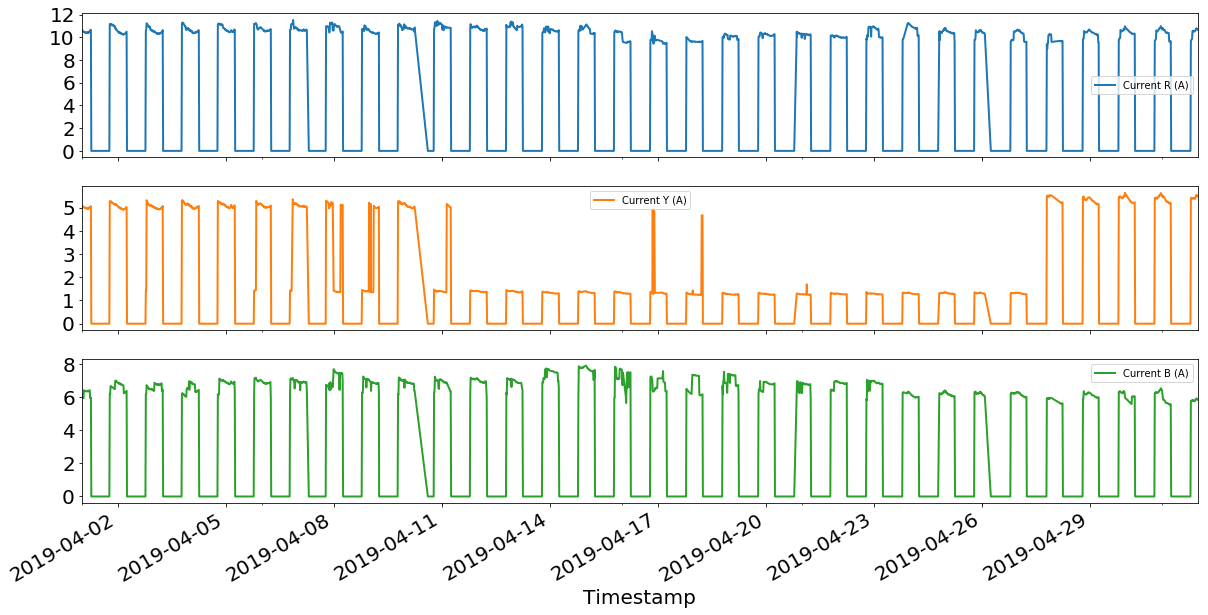

In [18]:
instant_raw_report_data[['Current R (A)', 'Current Y (A)', 'Current B (A)']].plot(figsize=(20,10), linewidth=2, fontsize=20, subplots=True)
plt.xlabel('Timestamp', fontsize=20);

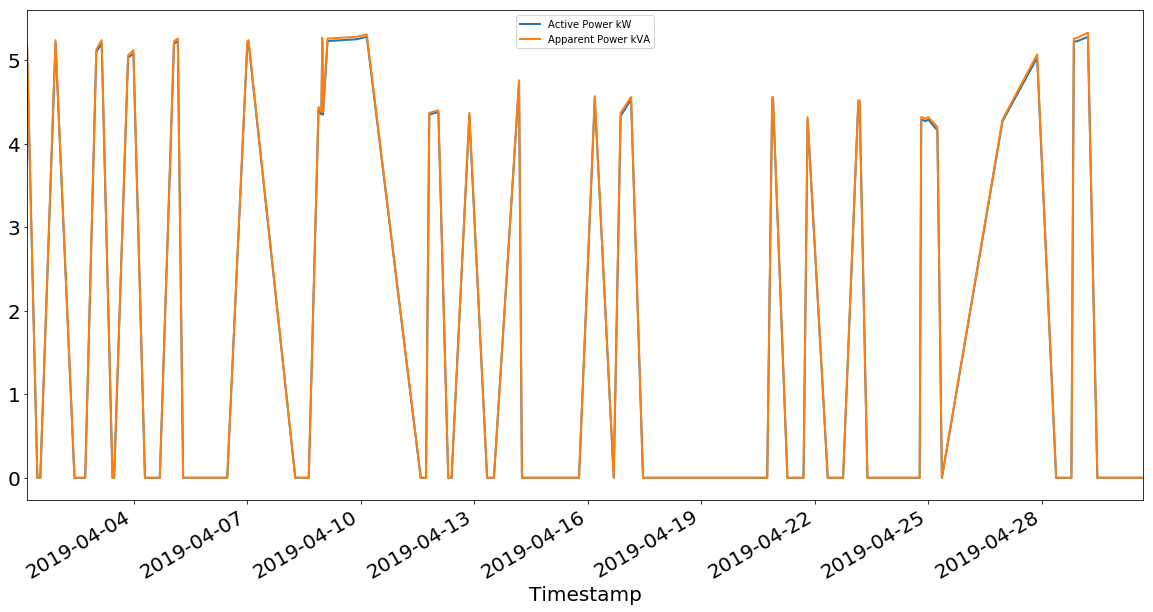

In [19]:
instant_raw_report_data[['Active Power kW', 'Apparent Power kVA']].sample(n=100).plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

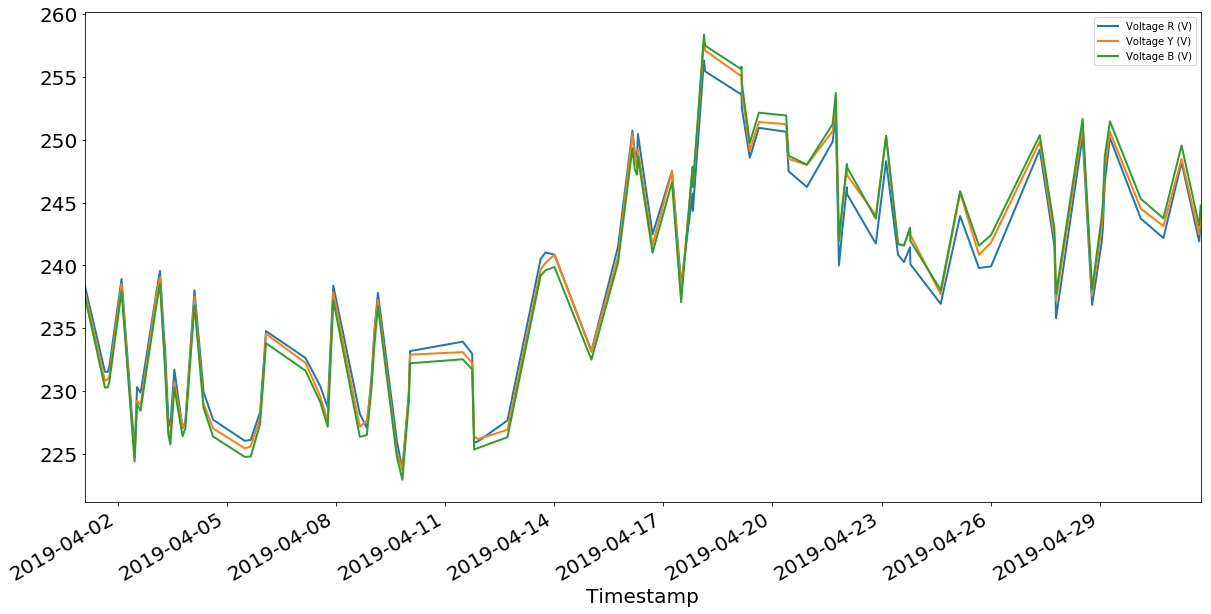

In [20]:
instant_raw_report_data[['Voltage R (V)', 'Voltage Y (V)', 'Voltage B (V)']].sample(n=100).plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);

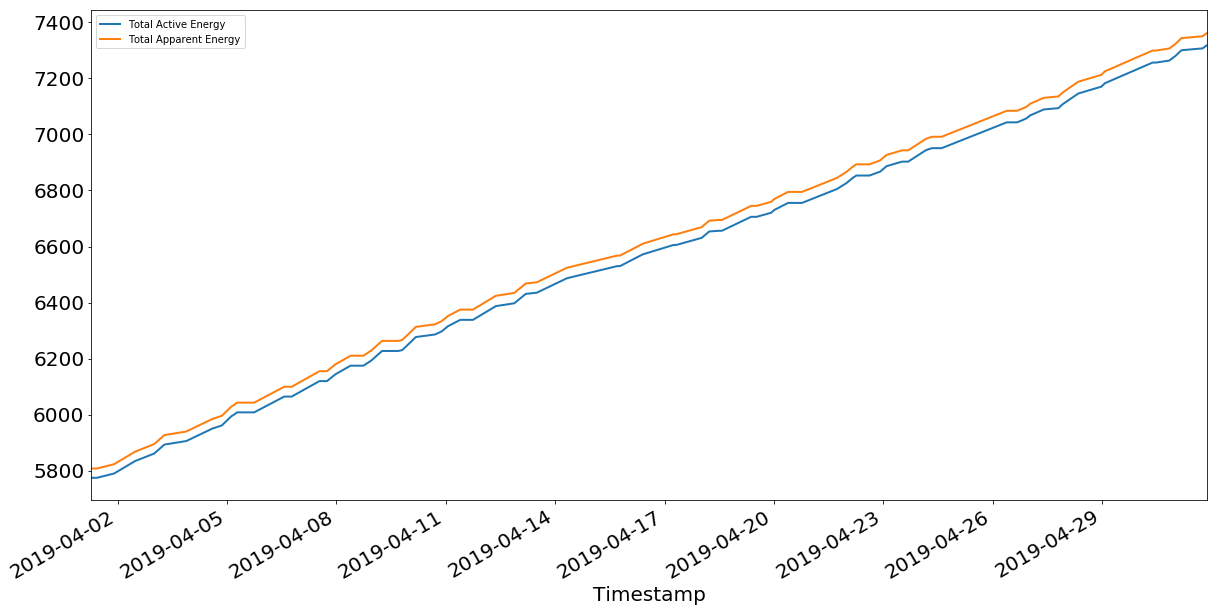

In [21]:
instant_raw_report_data[['Total Active Energy', 'Total Apparent Energy']].sample(n=100).plot(figsize=(20,10), linewidth=2, fontsize=20)
plt.xlabel('Timestamp', fontsize=20);